# AML CourseWork


In [1]:
from google.colab import files

uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import re
from string import punctuation



In [22]:
df = pd.read_csv("dataset.csv", encoding='latin1')

In [23]:
df.head()


,news,type
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business


In [24]:
df.shape


(2225, 2)

In [25]:
df.columns


Index(['news', 'type'], dtype='object')

In [26]:
df['type'].nunique()


5

In [27]:
df['type'].value_counts()


,count
type,
sport,511
business,510
politics,417
tech,401
entertainment,386


In [28]:
df = df.rename(columns={'news': 'text', 'type': 'category'})


In [29]:
df['category'].nunique()
df['category'].value_counts()


,count
category,
sport,511
business,510
politics,417
tech,401
entertainment,386


In [30]:
df = df.drop_duplicates(subset=['text', 'category']).reset_index(drop=True)



In [32]:
df

,text,category
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business
...,...,...
2122,Microsoft releases patches\n \n Microsoft has ...,tech
2123,Microsoft launches its own search\n \n Microso...,tech
2124,Warnings about junk mail deluge\n \n The amoun...,tech
2125,Gamers snap up new Sony PSP\n \n Gamers have b...,tech


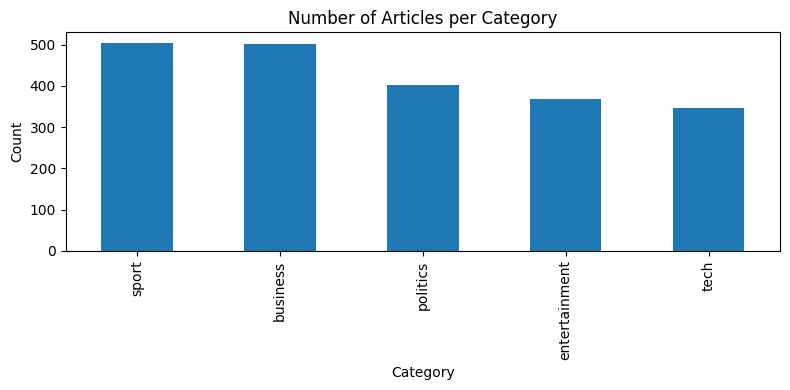

In [34]:
plt.figure(figsize=(8, 4))
df['category'].value_counts().plot(kind='bar')
plt.title("Number of Articles per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


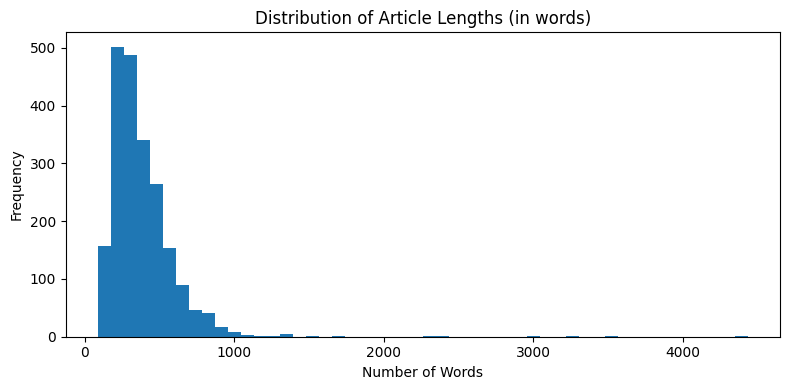

In [35]:
df['textLength'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
plt.hist(df['textLength'], bins=50)
plt.title("Distribution of Article Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [38]:
def clean_text(text: str) -> str:
    text = text.lower()
    # Remove punctuation
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [40]:
df_sample = df.sample(3, random_state=42)
print("\nSample cleaned texts:")
for original in df_sample['text']:
    print("Original:", original[:120].strip(), "...")
    print("Cleaned :", clean_text(original)[:120].strip(), "...")


Sample cleaned texts:
Original: Millions go missing at China bank
 
 Two senior officials at one of China's top commercial banks have reportedly disappe ...
Cleaned : millions go missing at china bank two senior officials at one of chinas top commercial banks have reportedly disappeared ...
Original: Portable PlayStation ready to go
 
 Sony's PlayStation Portable (PSP) will go on sale in Japan on 12 December.
 
 The lo ...
Cleaned : portable playstation ready to go sonys playstation portable psp will go on sale in japan on 12 december the longawaited ...
Original: Tomlinson stays focused on Europe
 
 Long jumper Chris Tomlinson has cut his schedule to ensure he is fully fit for the ...
Cleaned : tomlinson stays focused on europe long jumper chris tomlinson has cut his schedule to ensure he is fully fit for the eur ...
